# Assignment no 17 (Q1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv(r'C:\Users\Suneetha\python files\SalaryData_Train(1).csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [4]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
train.shape

(30161, 14)

In [7]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:>

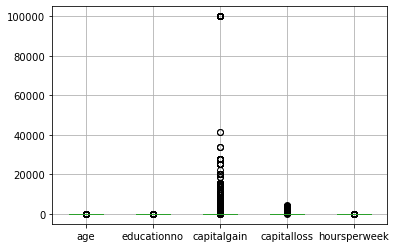

In [8]:
train.boxplot()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [11]:
test = pd.read_csv('/Users/sachin/Downloads/SalaryData_Test(1).csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [12]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [13]:
test.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [14]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [15]:
test.shape

(15060, 14)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [17]:
test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


# Data Preprocessing

In [18]:
lb = LabelEncoder()

In [19]:
train["workclass"] = lb.fit_transform(train["workclass"])
train["education"] = lb.fit_transform(train["education"])
train["maritalstatus"] = lb.fit_transform(train["maritalstatus"])
train["occupation"] = lb.fit_transform(train["occupation"])
train["relationship"] = lb.fit_transform(train["relationship"])
train["race"] = lb.fit_transform(train["race"])
train["sex"] = lb.fit_transform(train["sex"])
train["native"] = lb.fit_transform(train["native"])
train["Salary"] = lb.fit_transform(train["Salary"])

In [20]:
test["workclass"] = lb.fit_transform(test["workclass"])
test["education"] = lb.fit_transform(test["education"])
test["maritalstatus"] = lb.fit_transform(test["maritalstatus"])
test["occupation"] = lb.fit_transform(test["occupation"])
test["relationship"] = lb.fit_transform(test["relationship"])
test["race"] = lb.fit_transform(test["race"])
test["sex"] = lb.fit_transform(test["sex"])
test["native"] = lb.fit_transform(test["native"])
test["Salary"] = lb.fit_transform(test["Salary"])

# EDA

In [21]:
train = train.iloc[: 2000, :]

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            2000 non-null   int64
 1   workclass      2000 non-null   int64
 2   education      2000 non-null   int64
 3   educationno    2000 non-null   int64
 4   maritalstatus  2000 non-null   int64
 5   occupation     2000 non-null   int64
 6   relationship   2000 non-null   int64
 7   race           2000 non-null   int64
 8   sex            2000 non-null   int64
 9   capitalgain    2000 non-null   int64
 10  capitalloss    2000 non-null   int64
 11  hoursperweek   2000 non-null   int64
 12  native         2000 non-null   int64
 13  Salary         2000 non-null   int64
dtypes: int64(14)
memory usage: 218.9 KB


In [23]:
test = test.iloc[: 1300, :]

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            1300 non-null   int64
 1   workclass      1300 non-null   int64
 2   education      1300 non-null   int64
 3   educationno    1300 non-null   int64
 4   maritalstatus  1300 non-null   int64
 5   occupation     1300 non-null   int64
 6   relationship   1300 non-null   int64
 7   race           1300 non-null   int64
 8   sex            1300 non-null   int64
 9   capitalgain    1300 non-null   int64
 10  capitalloss    1300 non-null   int64
 11  hoursperweek   1300 non-null   int64
 12  native         1300 non-null   int64
 13  Salary         1300 non-null   int64
dtypes: int64(14)
memory usage: 142.3 KB


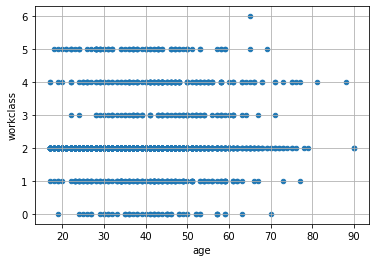

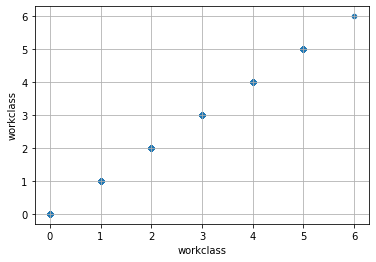

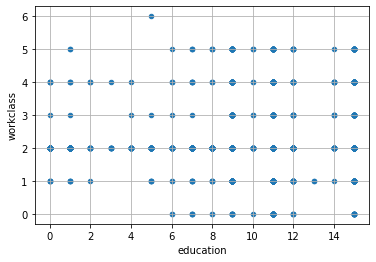

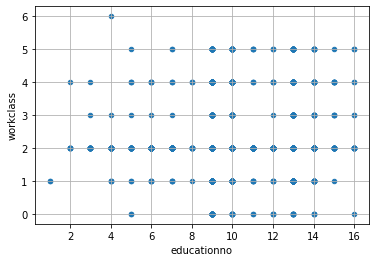

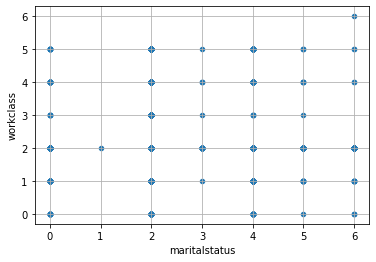

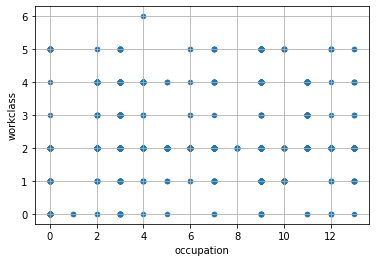

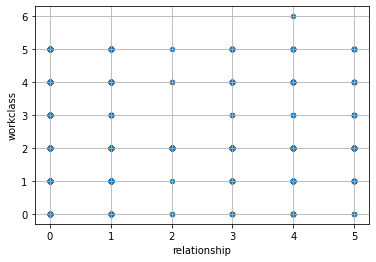

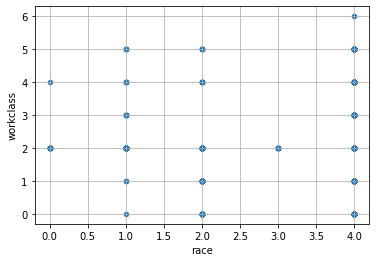

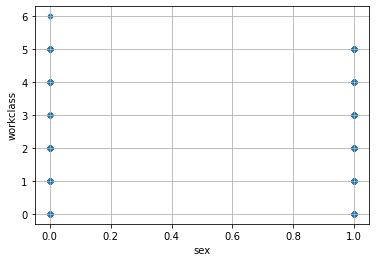

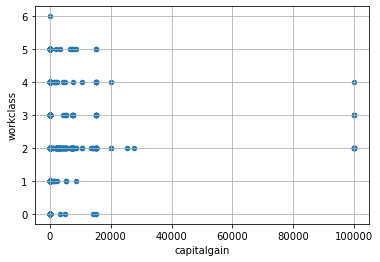

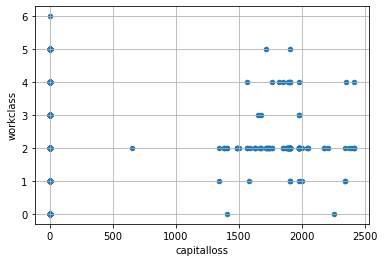

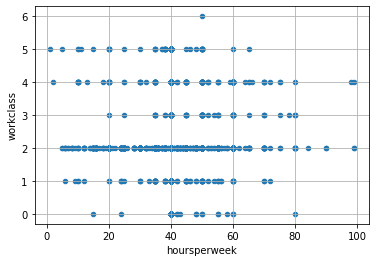

In [25]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'workclass',grid=True)

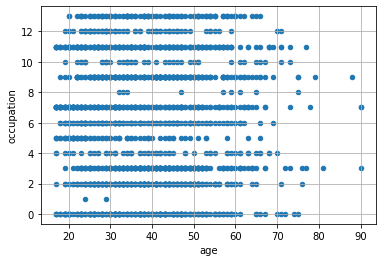

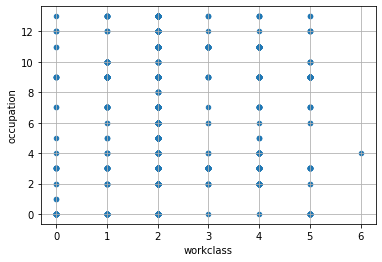

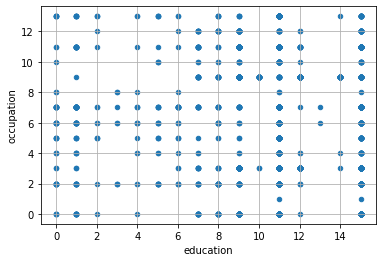

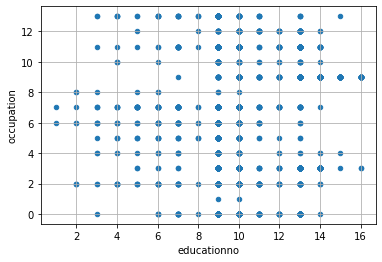

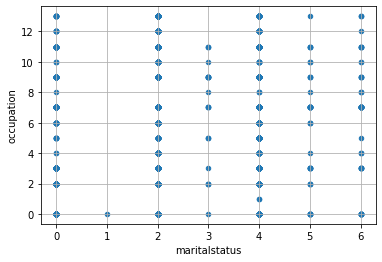

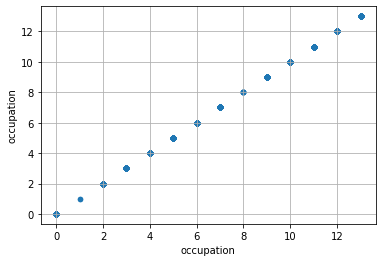

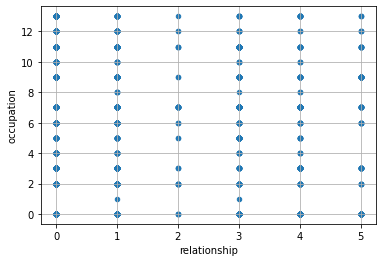

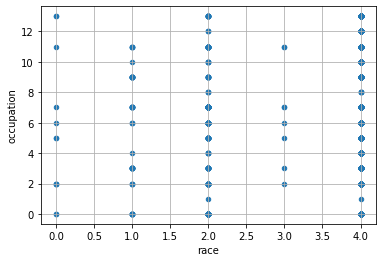

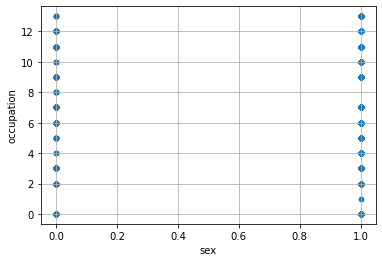

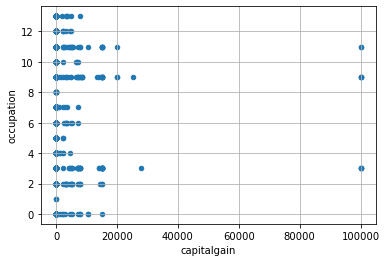

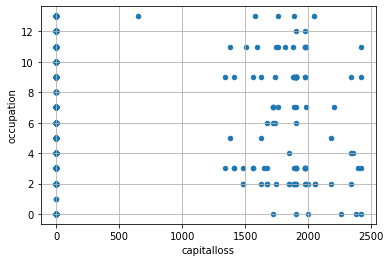

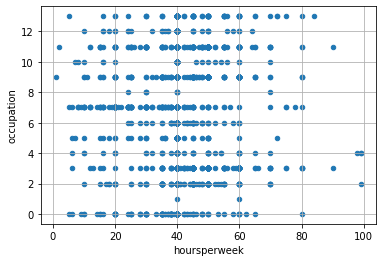

In [26]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'occupation',grid=True)

In [27]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080136,-0.004007,0.014781,-0.249467,-0.004634,-0.216588,0.015168,0.050730,0.081112,0.058997,0.114429,-0.001914,0.231176
workclass,0.080136,1.000000,0.029167,0.068866,-0.043219,0.033209,-0.074186,0.074418,0.087332,0.038314,-0.003069,0.031221,-0.036263,0.064561
education,-0.004007,0.029167,1.000000,0.328746,-0.047668,-0.028564,-0.033833,0.031098,-0.004879,0.035363,0.012082,0.060470,0.085718,0.051282
educationno,0.014781,0.068866,0.328746,1.000000,-0.062303,0.098459,-0.091217,0.075867,0.034123,0.095804,0.062601,0.172302,0.057602,0.308324
maritalstatus,-0.249467,-0.043219,-0.047668,-0.062303,1.000000,0.075036,0.157226,-0.083280,-0.078456,-0.044395,-0.016550,-0.187437,0.002006,-0.199289
occupation,-0.004634,0.033209,-0.028564,0.098459,0.075036,1.000000,-0.065478,0.035830,0.072483,0.016453,-0.015165,0.032509,-0.000106,0.026793
relationship,-0.216588,-0.074186,-0.033833,-0.091217,0.157226,-0.065478,1.000000,-0.100663,-0.557999,-0.052849,-0.042243,-0.256052,-0.054397,-0.211663
race,0.015168,0.074418,0.031098,0.075867,-0.083280,0.035830,-0.100663,1.000000,0.076281,0.018565,0.043238,0.065593,0.155655,0.068448
sex,0.050730,0.087332,-0.004879,0.034123,-0.078456,0.072483,-0.557999,0.076281,1.000000,0.030977,0.049696,0.205762,0.029781,0.182859
capitalgain,0.081112,0.038314,0.035363,0.095804,-0.044395,0.016453,-0.052849,0.018565,0.030977,1.000000,-0.033968,0.064462,-0.028919,0.220183


In [28]:
test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.132698,-0.058456,-0.028238,-0.299098,-0.035747,-0.253358,0.003103,0.074865,0.107361,0.057418,0.106105,0.018697,0.226220
workclass,0.132698,1.000000,0.068824,0.066220,-0.060726,0.011914,-0.082095,0.065081,0.049687,0.053677,0.062026,0.077106,0.043338,0.077615
education,-0.058456,0.068824,1.000000,0.409201,-0.039852,-0.023030,-0.024427,-0.005501,-0.011597,0.060160,0.038734,0.063598,0.069760,0.119016
educationno,-0.028238,0.066220,0.409201,1.000000,-0.091147,0.077972,-0.050679,0.072135,-0.011529,0.170971,0.111713,0.145317,0.106144,0.313422
maritalstatus,-0.299098,-0.060726,-0.039852,-0.091147,1.000000,-0.012545,0.197796,-0.085572,-0.147099,-0.071843,-0.018926,-0.161722,0.005488,-0.226209
occupation,-0.035747,0.011914,-0.023030,0.077972,-0.012545,1.000000,-0.063657,0.037160,0.073262,0.004247,-0.038230,0.018785,0.004193,0.018910
relationship,-0.253358,-0.082095,-0.024427,-0.050679,0.197796,-0.063657,1.000000,-0.158517,-0.588370,-0.060524,-0.037262,-0.298815,0.015321,-0.259728
race,0.003103,0.065081,-0.005501,0.072135,-0.085572,0.037160,-0.158517,1.000000,0.072954,0.017319,0.064287,0.058017,0.160356,0.076017
sex,0.074865,0.049687,-0.011597,-0.011529,-0.147099,0.073262,-0.588370,0.072954,1.000000,0.070784,0.053486,0.233998,-0.037813,0.206553
capitalgain,0.107361,0.053677,0.060160,0.170971,-0.071843,0.004247,-0.060524,0.017319,0.070784,1.000000,-0.036077,0.128418,0.032191,0.249281


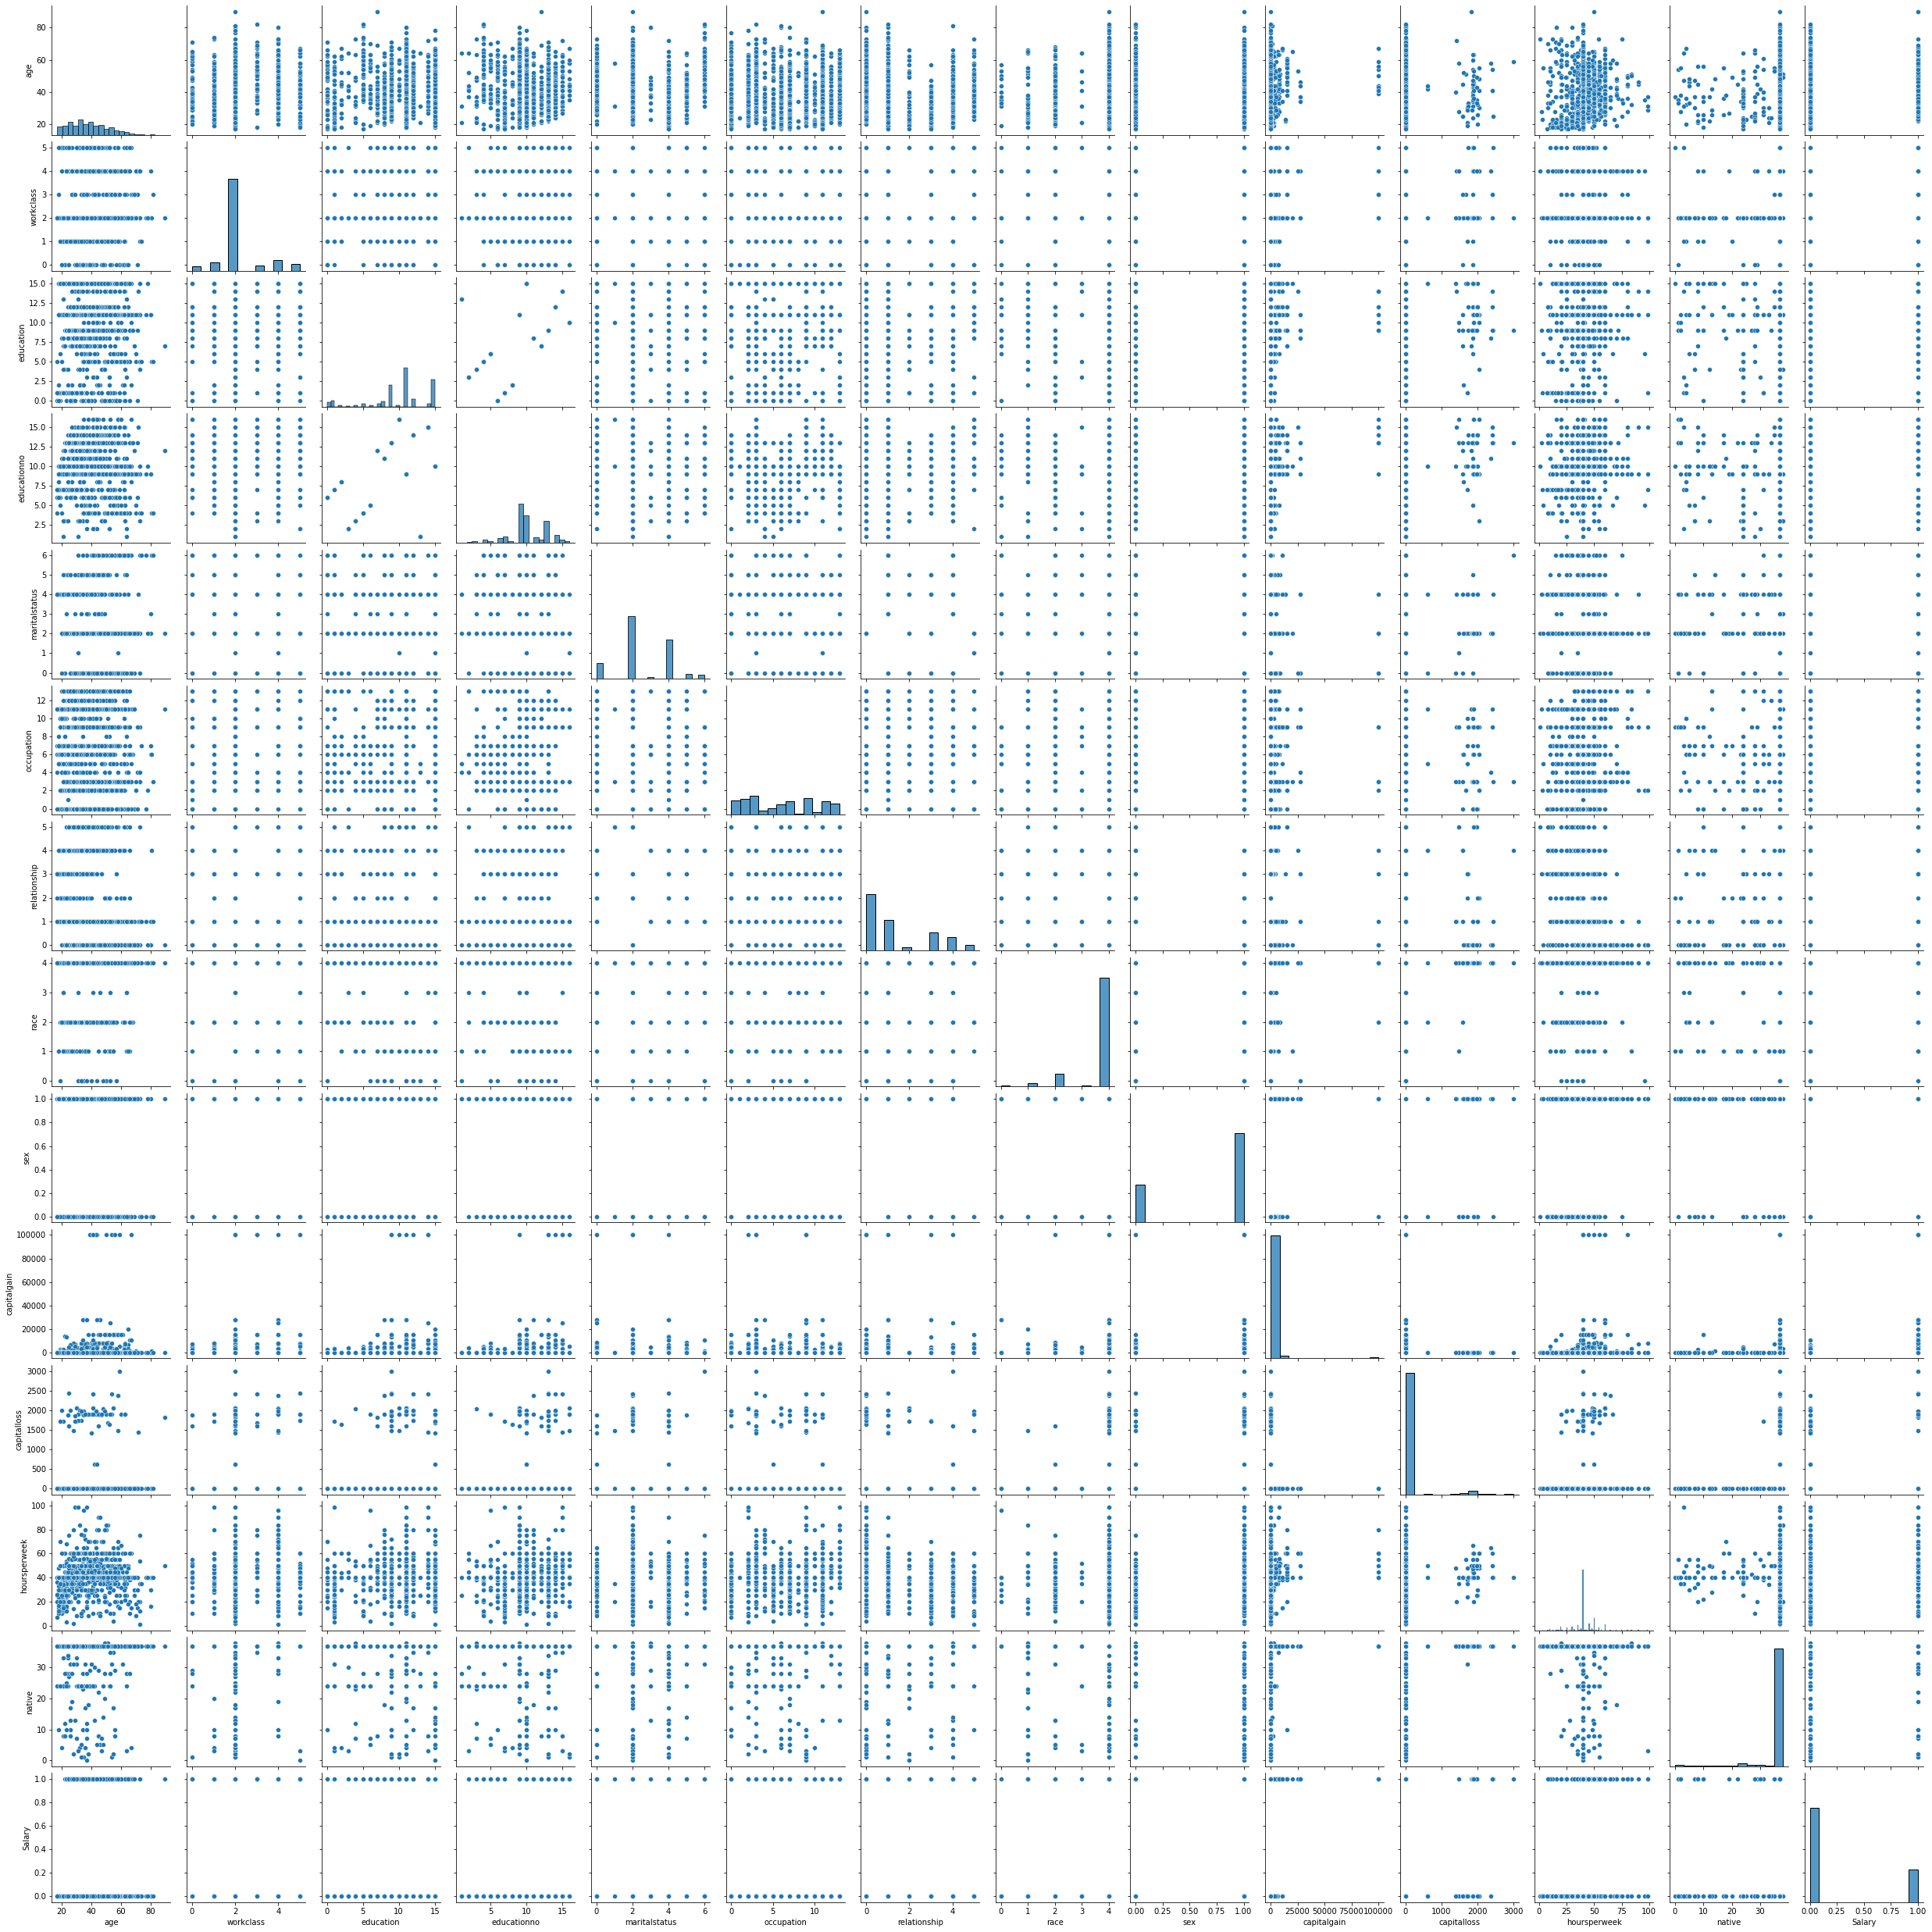

In [29]:
sns.pairplot(test)

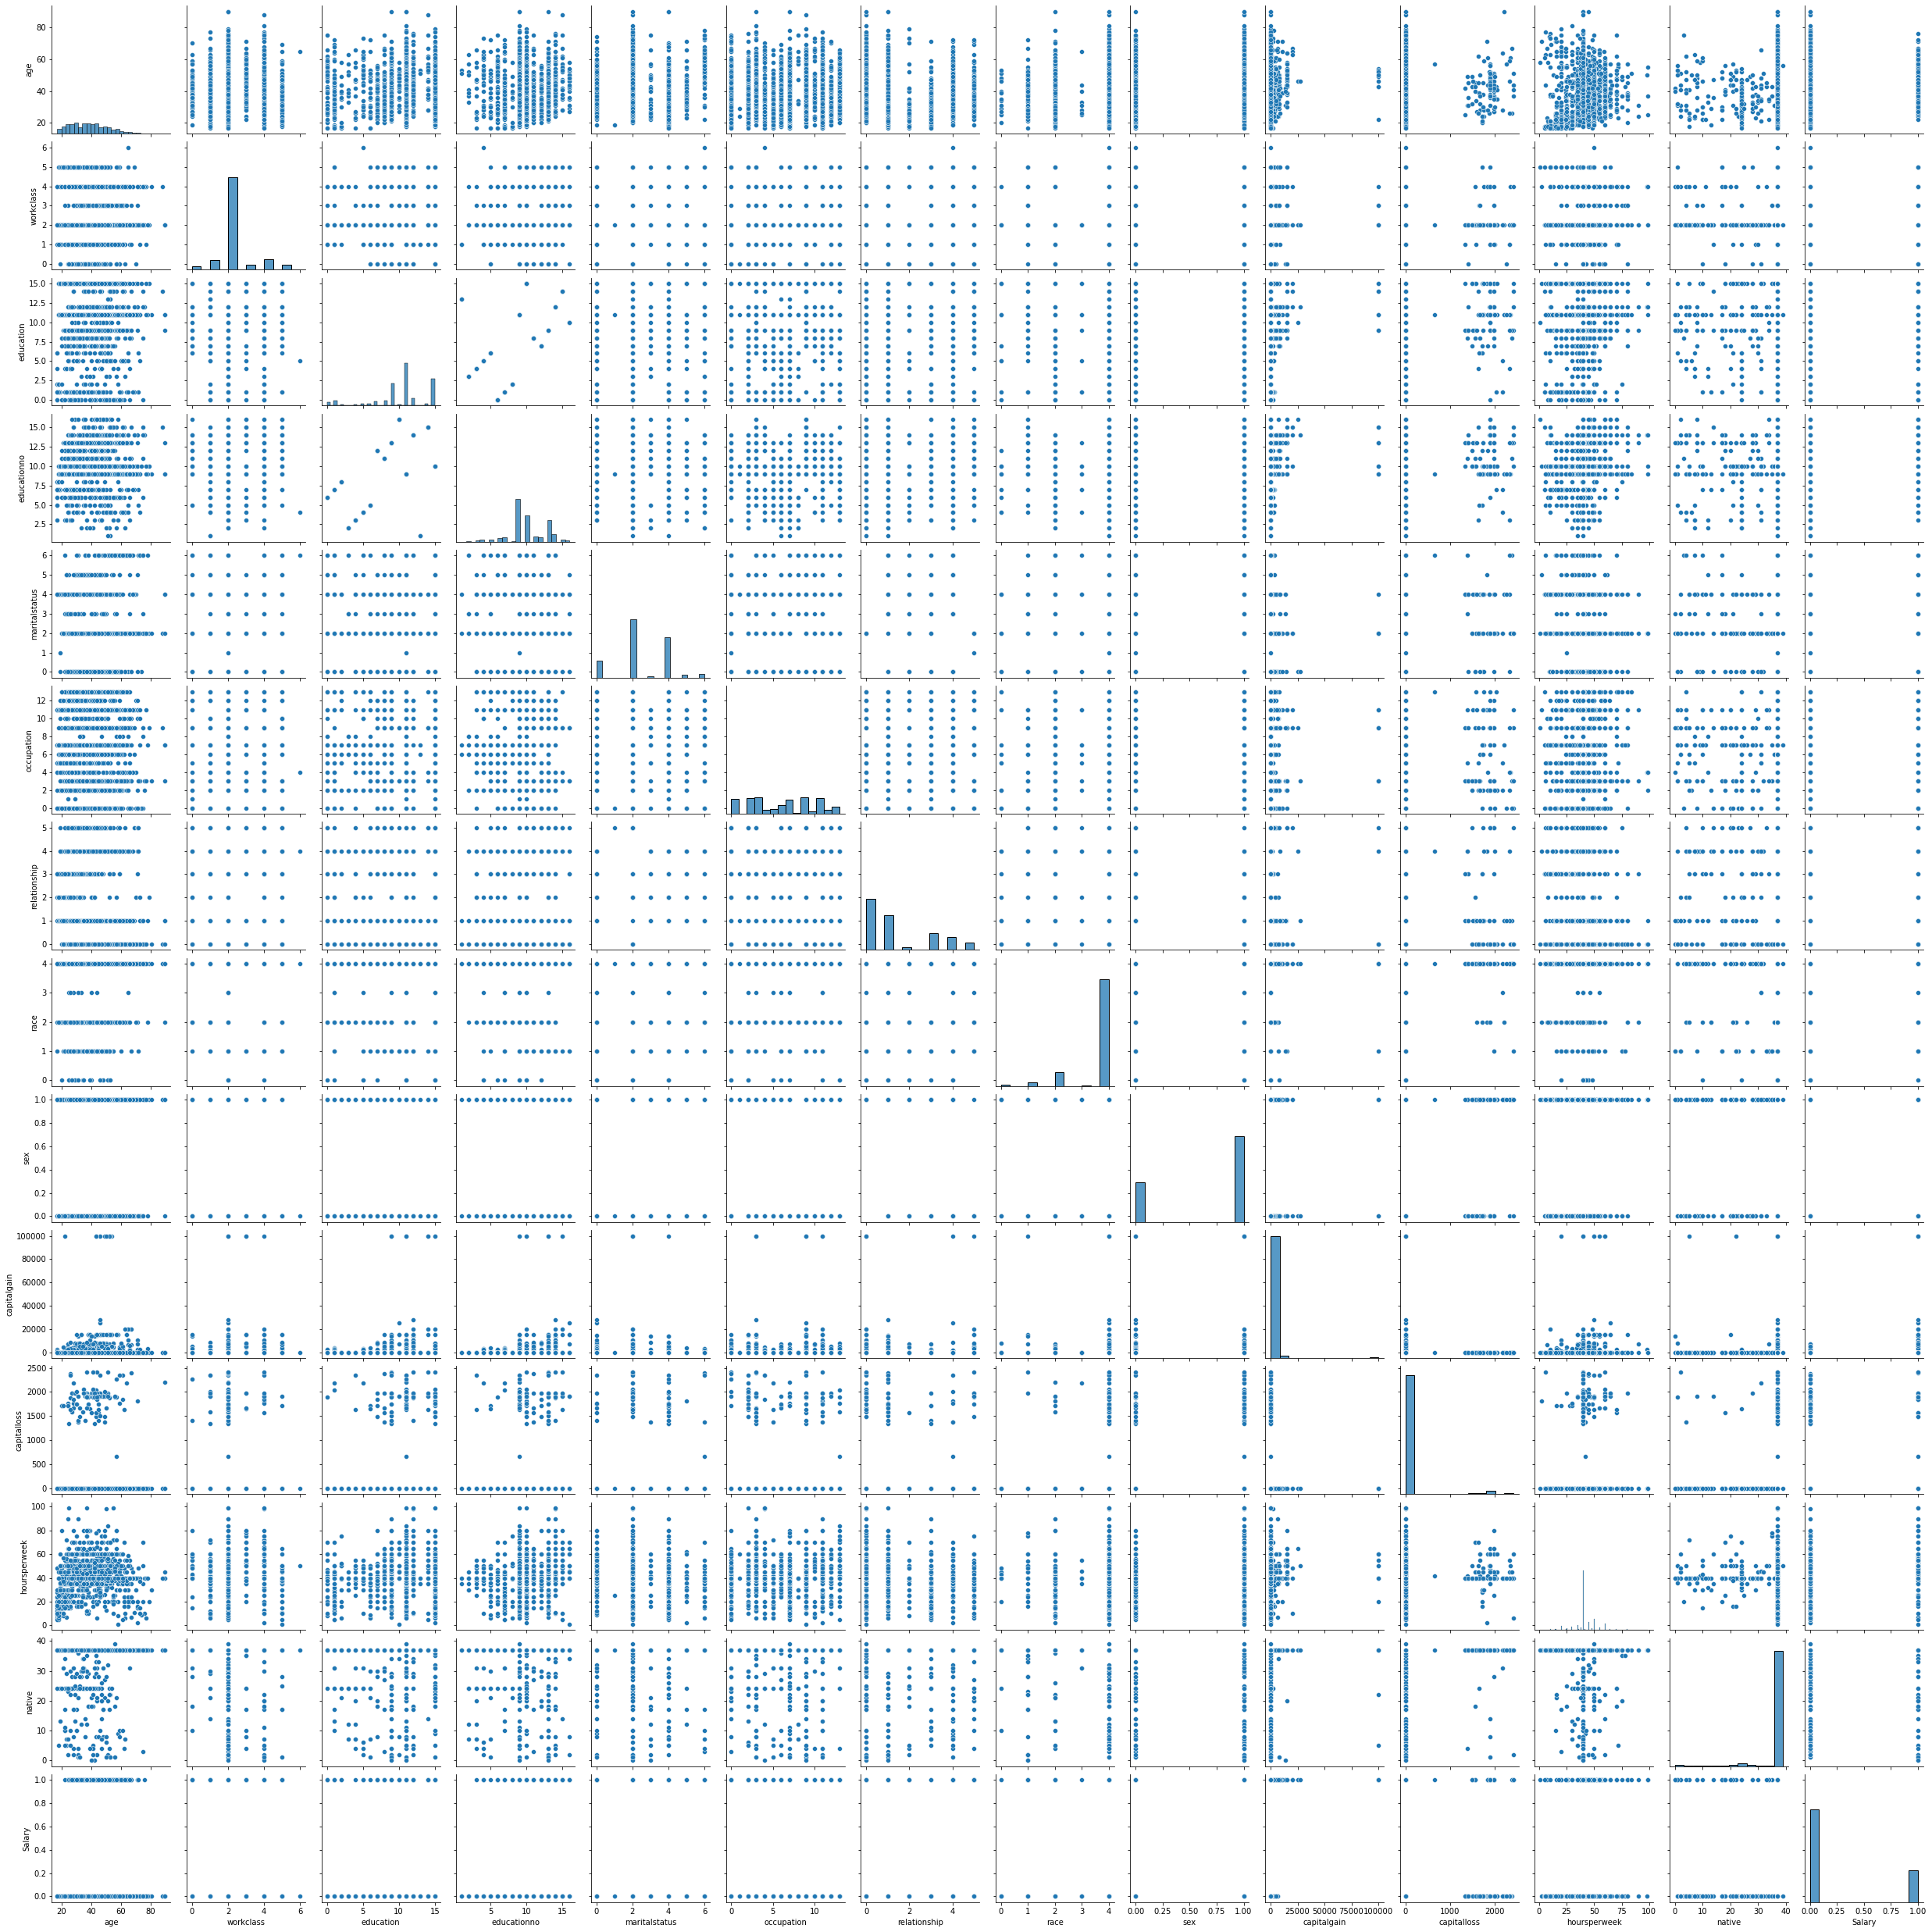

In [30]:
sns.pairplot(train)

# Data Splitting

In [31]:
X_train=train.iloc[:,:-1]
X_train


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,33,2,11,9,5,10,3,4,0,0,0,40,37
1996,41,2,11,9,2,6,0,4,1,0,0,40,37
1997,51,2,6,5,2,13,0,4,1,0,0,40,37
1998,42,2,11,9,2,11,0,4,1,0,0,48,37


In [32]:
y_train=train.iloc[:,-1]
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    1
Name: Salary, Length: 2000, dtype: int64

In [33]:
X_test=test.iloc[:,:-1]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,66,4,15,10,2,13,0,2,1,0,0,60,37
1296,40,2,15,10,4,2,2,0,1,0,0,30,37
1297,37,2,4,3,2,6,0,4,1,0,0,40,7
1298,34,2,9,13,2,11,0,4,1,0,0,40,37


In [34]:
y_test = test.iloc[:,-1]
y_test

0       0
1       0
2       1
3       1
4       0
       ..
1295    0
1296    0
1297    0
1298    0
1299    0
Name: Salary, Length: 1300, dtype: int64

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 13), (2000,), (1300, 13), (1300,))

# SVM Model

In [36]:
model = SVC()

model.fit(X_train, y_train)

SVC()

# Predicting model


In [37]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Model Evaluation

In [38]:
print(confusion_matrix(y_test, y_pred))

[[961   5]
 [267  67]]


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88       966
           1       0.93      0.20      0.33       334

    accuracy                           0.79      1300
   macro avg       0.86      0.60      0.60      1300
weighted avg       0.82      0.79      0.74      1300



# Inference
Model is not predicting well, so we will improve the model by hyperparameter tunning using grid search method.

# Improving Model using Grid Search CV


In [40]:

param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}

In [41]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)


In [42]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.752 total time=   0.3s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.750 total time=   0.3s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.3s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.3s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.743 total time=   0.3s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.3s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.3s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.3s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.3s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.3s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.775 total time=   0.2s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

[CV 2/5] END .........C=20, gamma=1, kernel=rbf;, score=0.745 total time=   0.3s
[CV 3/5] END .........C=20, gamma=1, kernel=rbf;, score=0.743 total time=   0.3s
[CV 4/5] END .........C=20, gamma=1, kernel=rbf;, score=0.750 total time=   0.3s
[CV 5/5] END .........C=20, gamma=1, kernel=rbf;, score=0.750 total time=   0.3s
[CV 1/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.723 total time=   0.3s
[CV 2/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.730 total time=   0.3s
[CV 3/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.725 total time=   0.3s
[CV 4/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.745 total time=   0.3s
[CV 5/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.3s
[CV 1/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.767 total time=   0.2s
[CV 2/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.807 total time=   0.2s
[CV 3/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.787 total time=   0.2s
[CV 4/5] END ......C=20, gam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [43]:
grid.best_params_

{'C': 15, 'gamma': 0.001, 'kernel': 'rbf'}

In [44]:
grid_pred = grid.predict(X_test)

# Model Evaluation

In [45]:
grid_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
print(confusion_matrix(y_test, grid_pred))

[[938  28]
 [198 136]]


In [47]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       966
           1       0.83      0.41      0.55       334

    accuracy                           0.83      1300
   macro avg       0.83      0.69      0.72      1300
weighted avg       0.83      0.83      0.80      1300



## Inference
So, using grid search method, we improved our model accuracy from 0.79 to 0.83

# Assignment no 17 (Q2)


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [59]:
data = pd.read_csv(r'C:\Users\Suneetha\python files\forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [60]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [61]:
data.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [62]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
data.shape

(517, 31)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [65]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

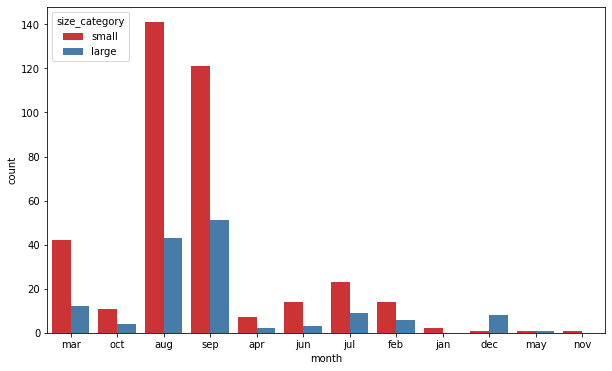

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'month', hue = 'size_category', data = data, palette='Set1')

 . From above observation, we can say most of the time forest fire broke during the month of August and September respective and during these time the fire caused small burnt area.
 . The area for large burnt area was almost twice as compared to small burnt area during August and September.

 . The forest caught fire mostly on sunday and friday.
 . Most of the times the count of small burn area of forest is almost twice that of large burn area of forest

# Data Preprocessing


In [67]:
label_encoder = preprocessing.LabelEncoder()

In [68]:
data["month"] = label_encoder.fit_transform(data["month"])
data["day"] = label_encoder.fit_transform(data["day"])
data["size_category"] = label_encoder.fit_transform(data["size_category"])

/Users/sachin/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


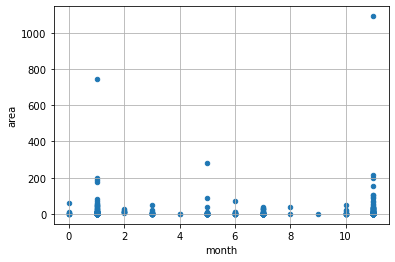

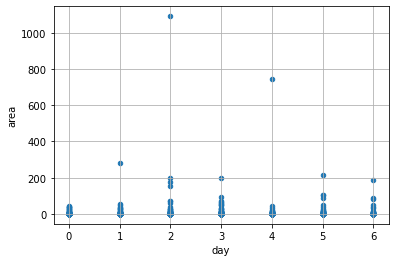

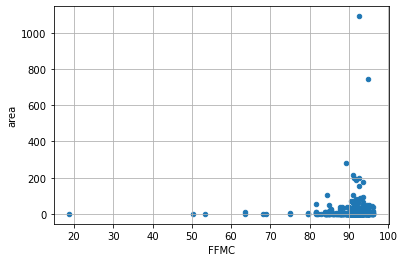

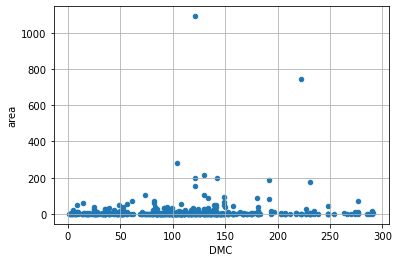

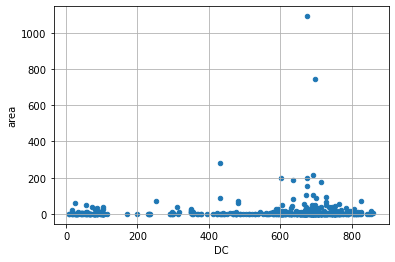

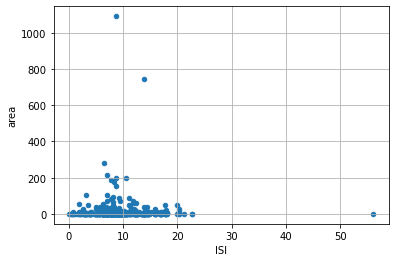

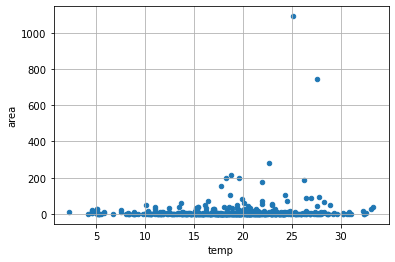

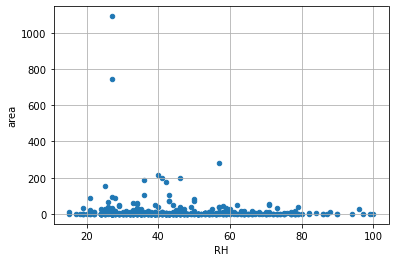

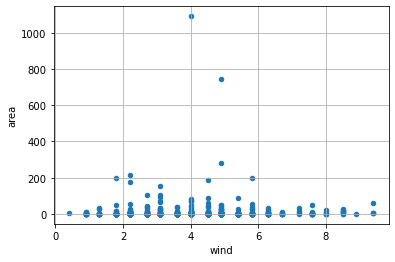

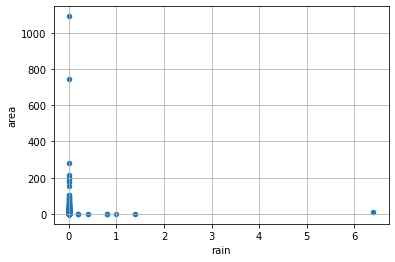

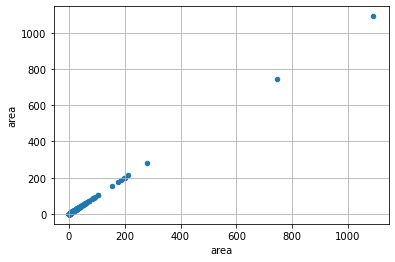

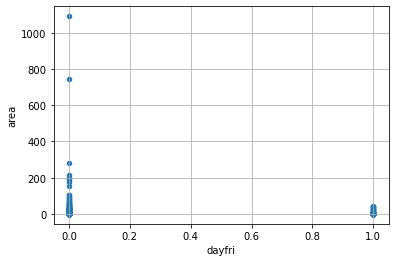

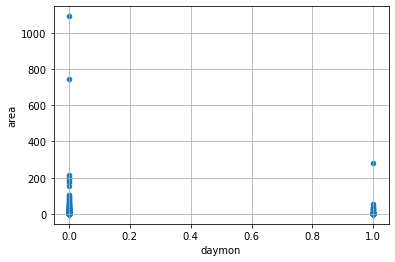

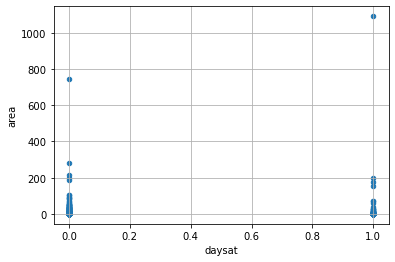

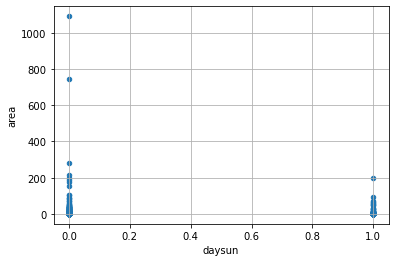

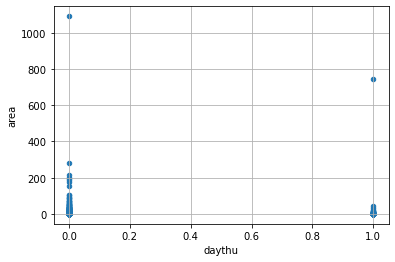

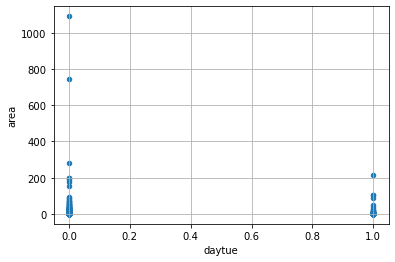

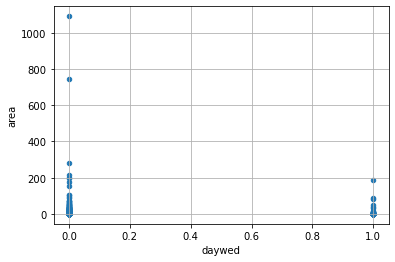

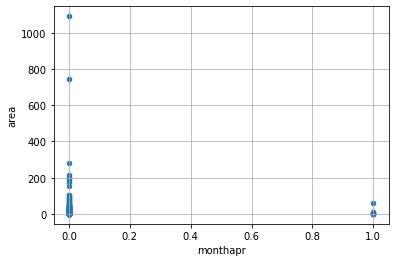

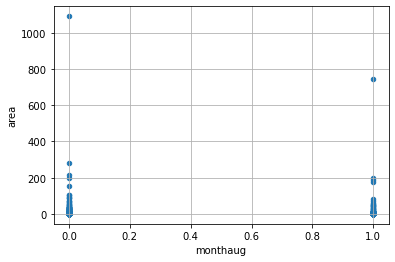

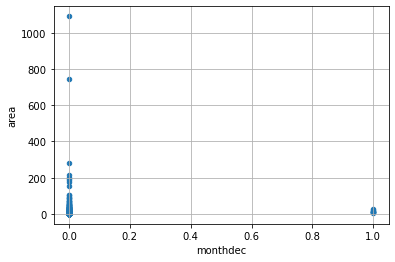

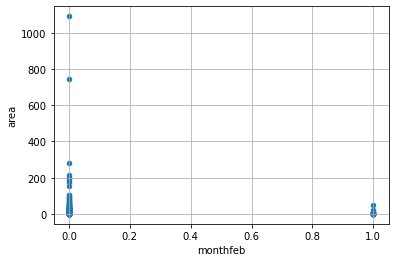

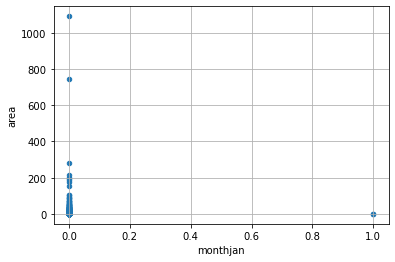

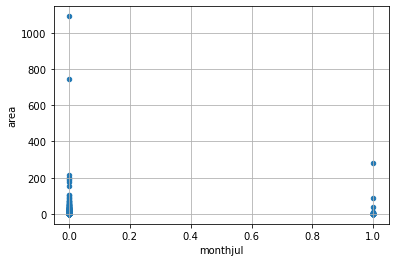

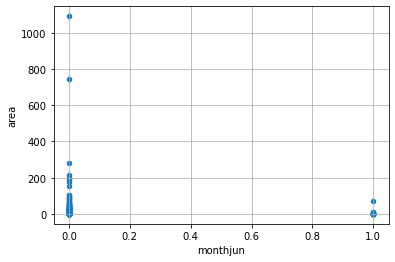

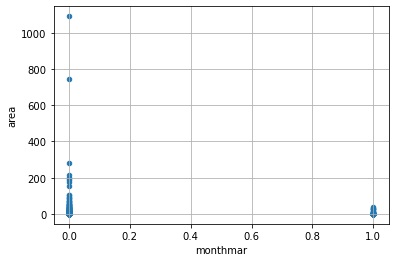

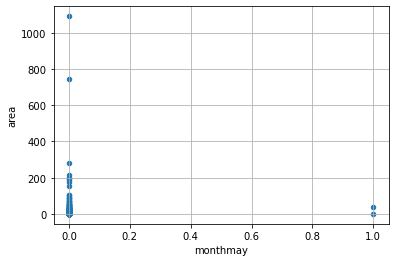

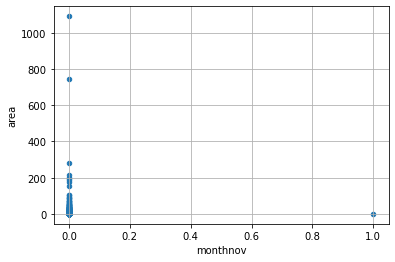

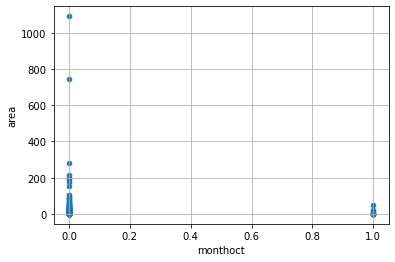

In [69]:
for i in data.describe().columns[:-2]:
    data.plot.scatter(i,'area',grid=True)

In [70]:
X = data.iloc[:,:11]
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [71]:
y=data["size_category"]
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [73]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((361, 11), (361,), (156, 11), (156,))

# SVM Model

In [74]:
model = SVC()

model.fit(X_train, y_train)

SVC()

# Predicting Model

In [76]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# Model Evaluation

In [77]:
print(confusion_matrix(y_test, y_pred))


[[  3  43]
 [  0 110]]


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.07      0.12        46
           1       0.72      1.00      0.84       110

    accuracy                           0.72       156
   macro avg       0.86      0.53      0.48       156
weighted avg       0.80      0.72      0.63       156



# Inference

.# Model is not predicting well, so we will improve the model by hyperparameter tunning using grid search method.

# Improving Model using Grid Search CV

In [79]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}


In [80]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)

In [81]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.726 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.764 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.778 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.849 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.833 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.847 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.918 total time=   0.0s
[CV 2/5] END ..C=1000, gamma

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [82]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [83]:
grid.best_estimator_

SVC(C=100, gamma=0.0001)

In [84]:
grid_pred = grid.predict(X_test)

# Evaluate Improved Model

In [85]:
grid_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1])

In [86]:
print(confusion_matrix(y_test, grid_pred))

[[ 41   5]
 [  5 105]]


In [87]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.95      0.95      0.95       110

    accuracy                           0.94       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.94      0.94      0.94       156



# Inference

In [ ]:
So, using grid search method, we improved our model accuracy.